### 12. Batch Normalization

- 신경망 학습 과정에서 부딪히는 문제(Gradient Vanishing, Gradient Exploding)와 해결방법 
    1) activation function 변경 (ex. sigmoid --> ReLU) 
    2) Weight initialization (ex. xavier, He) 
    3) small running rate 
    4) Batch normalization : mini-batch mean/variance를 구해서 데이터들을 정규화 한다. 

- 실전 코드 

In [1]:
import torch 
import torchvision.datasets as dsets
import torchvision.transforms as transforms 
import random 
import matplotlib.pyplot as plt 
import timeit 
device = 'cpu'

In [2]:
## parameters 
training_epochs = 20 
batch_size = 32 
learning_rate = 0.01 

In [3]:
## dataset and DataLoader
mnist_train = dsets.MNIST(root = 'MNIST_data/', 
                          train = True, 
                          transform = transforms.ToTensor(), 
                          download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/', 
                          train = False, 
                          transform = transforms.ToTensor(), 
                          download = True)

data_loader = torch.utils.data.DataLoader(dataset = mnist_train, 
                                           batch_size = batch_size, 
                                           shuffle = True, 
                                           drop_last = True ) 

In [8]:
## nn layers 
linear1 = torch.nn.Linear(28*28, 32, bias = True)
linear2 = torch.nn.Linear(32, 32, bias = True)
linear3 = torch.nn.Linear(32, 10, bias = True)

relu = torch.nn.ReLU()

## Batch Normalization layers 
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

In [9]:
## model <-- insert bn layers 
model = torch.nn.Sequential(linear1, bn1, relu, 
                            linear2, bn2, relu, 
                            linear3).to(device)

## cost, optimizer 
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [10]:
total_batch = len(data_loader)
model.train()

start_time = timeit.default_timer()  ## start time check 

for epoch in range(training_epochs) : 
    avg_cost = 0 
    for X, Y in data_loader : 
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('epoch:', epoch+1, 'cost=', avg_cost)


end_time = timeit.default_timer()  ## end time check 
print('Running time :', end_time - start_time)

epoch: 1 cost= tensor(0.2750, grad_fn=<AddBackward0>)
epoch: 2 cost= tensor(0.1692, grad_fn=<AddBackward0>)
epoch: 3 cost= tensor(0.1430, grad_fn=<AddBackward0>)
epoch: 4 cost= tensor(0.1311, grad_fn=<AddBackward0>)
epoch: 5 cost= tensor(0.1189, grad_fn=<AddBackward0>)
epoch: 6 cost= tensor(0.1117, grad_fn=<AddBackward0>)
epoch: 7 cost= tensor(0.1047, grad_fn=<AddBackward0>)
epoch: 8 cost= tensor(0.1009, grad_fn=<AddBackward0>)
epoch: 9 cost= tensor(0.0974, grad_fn=<AddBackward0>)
epoch: 10 cost= tensor(0.0907, grad_fn=<AddBackward0>)
epoch: 11 cost= tensor(0.0891, grad_fn=<AddBackward0>)
epoch: 12 cost= tensor(0.0873, grad_fn=<AddBackward0>)
epoch: 13 cost= tensor(0.0837, grad_fn=<AddBackward0>)
epoch: 14 cost= tensor(0.0798, grad_fn=<AddBackward0>)
epoch: 15 cost= tensor(0.0792, grad_fn=<AddBackward0>)
epoch: 16 cost= tensor(0.0754, grad_fn=<AddBackward0>)
epoch: 17 cost= tensor(0.0747, grad_fn=<AddBackward0>)
epoch: 18 cost= tensor(0.0727, grad_fn=<AddBackward0>)
epoch: 19 cost= ten

Accuracy: 0.7868000268936157
Label:  7
Prediction:  7


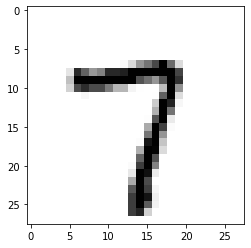

In [11]:
# Test the model using test sets

with torch.no_grad():
    model.eval()  
    
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    single_prediction = model(X_single_data)
    print('Label: ', Y_single_data.item())
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()